In [1589]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1590]:
#reading the csv file
data = pd.read_csv(os.getcwd() + '/data.csv')
data.head(10)

,SYS_LOC_CODE,obdiffcard,obdiffhbp,obdiffkidney,obdiffliver,RACE__1,RACE__2,RACE__3,RACE__4,RACE__5,...,ivf,MULTIFETUS,pptypelabor,ppinduct,pppretlabw,pppreeclampsia,vitd,vitdfreq,cal,calfreq
0,1001,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,1006,NaN,NaN,NaN,NaN,1,1,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,1009,NaN,NaN,NaN,NaN,0,0,1,0,0,...,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1012,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN
4,1013,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
5,1014,NaN,NaN,NaN,NaN,0,1,0,0,0,...,0.0,0,3.0,NaN,33.0,NaN,0.0,NaN,0.0,NaN
6,1015,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
7,1018,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN
8,1019,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
9,1020,NaN,NaN,NaN,NaN,1,1,1,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN


# Preprocessing Data

In [1591]:
#removing the following columns since its highly imbalanced and there arent any significant values of 1s in the columns. 
data_new = data.drop(columns = ['race97', 'preveclmp', 'tvcurrpreeclmp', 'tvcurreclmp', 'curreclmp', 'currpreeclmp']) 

data_new = data_new.loc[:, data_new.columns != 'SYS_LOC_CODE'] #all columns except SYS_LOC_CODE
# data_new = data_new.loc[:, data_new.columns != 'pppreeclampsia']

cols = ['alcdays' , 'fvcurrht_foot' , 'fvcurrht_inch' , 'wtprepreg' , 'prembirthnum' , 'pregnum', 'prevpreeclmp', 'pppreeclampsia']
data_new[cols]=data_new[cols].fillna(data_new.mode().iloc[0])

In [1592]:
data_new.dtypes

obdiffcard          float64
obdiffhbp           float64
obdiffkidney        float64
obdiffliver         float64
RACE__1               int64
RACE__2               int64
RACE__3               int64
RACE__4               int64
RACE__5               int64
RACE__6               int64
RACE__97              int64
RACE__888             int64
RACE__999             int64
hisp                float64
smkever             float64
alcdays             float64
marijuse            float64
druguse             float64
fvcurrht_foot       float64
fvcurrht_inch       float64
wtprepreg           float64
prembirthnum        float64
pregnum             float64
prevpreeclmp        float64
currhd              float64
currgd              float64
prevhyp             float64
preghyp_durante     float64
prevdiab            float64
pregdiab_durante    float64
preglup_durante     float64
prevlup             float64
tvcurrgd            float64
ivf                 float64
MULTIFETUS            int64
pptypelabor         

In [1593]:
data_clean = data_new.apply(lambda x: [y if y <= 500 else 0 for y in x])
data_clean["SYS_LOC_CODE"] = data["SYS_LOC_CODE"]
# data_clean["pppreeclampsia"] = data["pppreeclampsia"]
data_clean =data_clean[data_clean.pppreeclampsia.isin([9999]) == False]
print (data_clean)

data = data_clean
del data_clean
del data_new

      obdiffcard  obdiffhbp  obdiffkidney  obdiffliver  RACE__1  RACE__2  \
0            0.0        0.0           0.0          0.0        1        0   
1            0.0        0.0           0.0          0.0        1        1   
2            0.0        0.0           0.0          0.0        0        0   
3            0.0        0.0           0.0          0.0        1        0   
4            0.0        0.0           0.0          0.0        1        0   
...          ...        ...           ...          ...      ...      ...   
1854         0.0        0.0           0.0          0.0        0        0   
1855         0.0        0.0           0.0          0.0        0        0   
1856         0.0        0.0           0.0          0.0        0        0   
1857         0.0        0.0           0.0          0.0        0        0   
1858         0.0        0.0           0.0          0.0        0        0   

      RACE__3  RACE__4  RACE__5  RACE__6  ...  MULTIFETUS  pptypelabor  \
0           0

In [1594]:
##old code(review) 
# data_clean = data_new.apply(lambda x: [y if y <= 500 else 0 for y in x])
# data_clean["SYS_LOC_CODE"] = data["SYS_LOC_CODE"]
# data_clean["pppreeclampsia"] = data["pppreeclampsia"]
# data_clean =data_clean[data_clean.pppreeclampsia.isin([9999]) == False]
# print (data_clean)

# data = data_clean
# del data_clean
# del data_new

We're using pppreeclempsia as the target variable. Let's look at the distribution of the target

In [1595]:
data['pppreeclampsia'].value_counts()

0.0    1827
1.0      32
Name: pppreeclampsia, dtype: int64

One of the biggest challenge of this problem is that the target is highly imbalanced as only 3.1 % cases have post partum preeclemspia. But the advantage of the representation learning approach is that it is still able to handle such imbalance nature of the problems. 

# Semi Supervised Learning

"Semi-supervised learning is an approach to machine learning that combines a small amount of labeled data with a large amount of unlabeled data during training. Semi-supervised learning falls between unsupervised learning (with no labeled training data) and supervised learning (with only labeled training data). It is a special instance of weak supervision."

In this approach, the properties of unspervised learning are used to learn the best possible representation of data and the properties of supervised learning are used to learn the relationships in the representations which are then used to make predictions.

We make use of autoencoders to learn the representation of the data then a classifier is trained to classify the dataset into respective classes.

# Unsupervised ML Using Autoencoders


In [1596]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)


In [1597]:
#considering target variable as pppreeclampsia
non_ppclmp = data[data['pppreeclampsia'] == 0].sample(500)
ppclmp = data[data['pppreeclampsia'] == 1]

df = non_ppclmp.append(ppclmp).sample(frac=1).reset_index(drop=True)
X = df.drop(['pppreeclampsia', 'SYS_LOC_CODE'], axis = 1).values
Y = df["pppreeclampsia"].values

For our use-case let's take only about 500 rows of pppreeclampsia(since there are only 32/1859 cases of post partum preeclemsia).

In [1598]:
ppclmp

,obdiffcard,obdiffhbp,obdiffkidney,obdiffliver,RACE__1,RACE__2,RACE__3,RACE__4,RACE__5,RACE__6,...,MULTIFETUS,pptypelabor,ppinduct,pppretlabw,pppreeclampsia,vitd,vitdfreq,cal,calfreq,SYS_LOC_CODE
231,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2037
249,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2064
250,0.0,0.0,0.0,0.0,0,0,0,0,0,1,...,0,3.0,0.0,35.0,1.0,0.0,0.0,0.0,0.0,2066
293,0.0,0.0,0.0,0.0,0,0,0,0,0,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2125
382,0.0,0.0,0.0,0.0,0,0,0,0,0,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2232
421,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2282
473,0.0,0.0,0.0,0.0,0,0,0,0,0,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2339
513,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2382
530,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2402
537,0.0,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2411


## Visualization of Post Partum and Non Post Partum Preeclampsia Cases

Let's visualize the nature of Post Partum and Non Post Partum Preeclamsia cases using T-SNE. T-SNE (t-Distributed Stochastic Neighbor Embedding) is a dataset decomposition technique which reduced the dimentions of data and produces only top n components with maximum information.

Every dot in the following represents a medical case. Non Post Partum Preeclampisa are represented as Green while Post PArtum Preeclampsia transactions are represented as Red. The two axis are the components extracted by tsne.

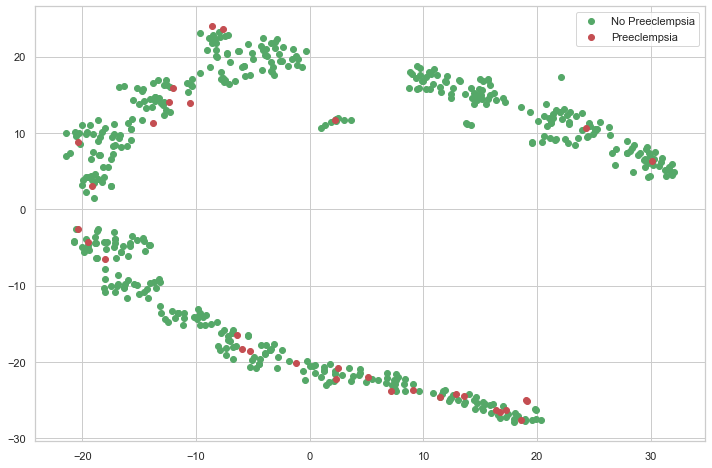

In [1599]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], color='g', label='No Preeclempsia')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], color='r', label='Preeclempsia')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

From the above graph we can observe that there are many non post partum preeclampsia cases which are very close to post partum preeclemsia cases, thus are difficult to accurately classify from a model.

## Autoencoders

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

We will create an autoencoder model in which we only show the model non-post partum preeclampsia cases. The model will try to learn the best representation of non-post partum preeclampsia cases. The same model will be used to generate the representations of post partum preeclampsia cases and we expect them to be different from non-post partum preeclampsia ones.

Create a network with one input layer and one output layer having identical dimentions ie. the shape of non-post partum preeclampsia cases. We will use keras package

In [1600]:
## input layer 
input_layer = Input(shape=(X.shape[1],))
input_layer

<tf.Tensor 'input_50:0' shape=(None, 42) dtype=float32>

In [1601]:
## encoding part
encoded = Dense(50, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(25, activation='relu')(encoded)

## decoding part
decoded = Dense(25, activation='tanh')(encoded)
decoded = Dense(50, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [1602]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [1603]:
x = data.drop(["pppreeclampsia", 'SYS_LOC_CODE'], axis=1)
y = data["pppreeclampsia"].values

x_scale = preprocessing.StandardScaler().fit_transform(x.values)
x_non_ppclmp, x_ppclmp = x_scale[y == 0], x_scale[y == 1]

In [1604]:
len(x_non_ppclmp)

1827

The beauty of this approach is that we do not need too many samples of data for learning the good representations. We will use only 1000 rows of non post partum preeclampsia cases to train the autoencoder. Additionally, We do not need to run this model for a large number of epochs.

##### Explanation:  The choice of small samples from the original dataset is based on the intuition that one class characteristics (non post partum preeclampsia) will differ from that of the other (post partum preeclampsia). To distinguish these characteristics we need to show the autoencoders only one class of data. This is because the autoencoder will try to learn only one class and automaticlly distinguish the other class.

In [1605]:
autoencoder.fit(x_non_ppclmp[0:1000], x_non_ppclmp[0:1000], 
                batch_size = 64, epochs = 100, 
                shuffle = True, validation_split = 0.20);

Epoch 1/100
13/13 [==============================] - 0s 27ms/step - loss: 0.9644 - val_loss: 0.6548
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.9643 - val_loss: 0.6547
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.9643 - val_loss: 0.6546
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9642 - val_loss: 0.6546
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9641 - val_loss: 0.6545
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9640 - val_loss: 0.6544
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.9639 - val_loss: 0.6543
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9639 - val_loss: 0.6543
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9638 - val_loss: 0.6542
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9637 - val_loss: 0.6541
Epoch 11

Epoch 83/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9576 - val_loss: 0.6486
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9576 - val_loss: 0.6485
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9575 - val_loss: 0.6484
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9574 - val_loss: 0.6484
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9573 - val_loss: 0.6483
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9572 - val_loss: 0.6482
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9572 - val_loss: 0.6481
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9571 - val_loss: 0.6481
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9570 - val_loss: 0.6480
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9569 - val_loss: 0.6479


## Latent Representations

Now, the model is trained. We are intereseted in obtaining latent representation of the input learned by the model. This can be accessed by the weights of the trained model. We will create another network containing sequential layers, and we will only add the trained weights till the third layer where latent representation exists.

In [1606]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

Generate the hidden representations of two classes : non-post partum preclempsia cases and post partum preclempsia cases by predicting the raw inputs using the above model.

In [1607]:
non_ppclmp_hid_rep = hidden_representation.predict(x_non_ppclmp[:951])
ppclmp_hid_rep = hidden_representation.predict(x_ppclmp)

In [1608]:
non_ppclmp_hid_rep

array([[0.        , 0.7451541 , 0.7536295 , ..., 0.        , 0.        ,
        0.96361345],
       [0.6901841 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.6482701 , 0.        , ..., 0.        , 0.        ,
        0.694343  ],
       ...,
       [0.75109255, 0.27581003, 0.        , ..., 0.1074982 , 0.        ,
        0.        ],
       [0.        , 0.26582107, 0.0338025 , ..., 0.        , 0.        ,
        0.54453695],
       [0.        , 0.        , 0.78808004, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

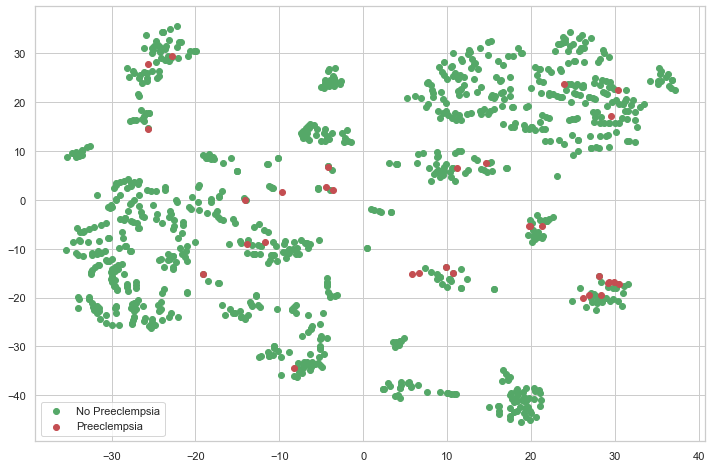

In [1609]:
rep_x = np.append(non_ppclmp_hid_rep, ppclmp_hid_rep, axis = 0)
y_np = np.zeros(non_ppclmp_hid_rep.shape[0])
y_p = np.ones(ppclmp_hid_rep.shape[0])
rep_y = np.append(y_np, y_p)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [1610]:
rep_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Classifier(Supervised)

In [1611]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)

## Model 1 : Logistic Regression

In [1612]:
logreg = LogisticRegression()

In [1613]:
logreg.fit(train_x, train_y)
log_predicted= logreg.predict(val_x)

In [1614]:
print ("Accuracy Score: ", accuracy_score(log_predicted, val_y))

Accuracy Score:  0.9634146341463414


## Model 2 : XG Boost

In [1615]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_x, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1616]:
# make predictions
predictions = my_model.predict(val_x)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error : 0.06420951438642958
